In [1]:
# Importing necessary libraries for data handling and statistical analysis
import pandas as pd  # For managing datasets
from scipy.stats import zscore  # For computing standardized Z-scores

In [2]:
# Loading the Weight-Height dataset from the specified file path
df = pd.read_csv("C:/Users/dbda.STUDENTSDC/Music/LabPractice/Notebooks/Datasets/weight-height.csv")

In [3]:
# Calculating mean and standard deviation for weight
weight_mean = df['Weight'].mean()  # Average weight of individuals
weight_std = df['Weight'].std()  # Standard deviation of weight values

# Calculating mean and standard deviation for height
height_mean = df['Height'].mean()  # Average height of individuals
height_std = df['Height'].std()  # Standard deviation of height values

In [4]:
# Compute Z-scores for weight and height to standardize values
df['Weight_zscore'] = zscore(df['Weight'])  # Standardized weight values
df['Height_zscore'] = zscore(df['Height'])  # Standardized height values

In [5]:
# Display the mean and standard deviation for Weight and Height with formatted output
print(f"Mean of Weight: {weight_mean:.2f}")  # Rounds mean weight to 2 decimal places
print(f"Standard Deviation of Weight: {weight_std:.2f}")  # Rounds standard deviation of weight
print(f"Mean of Height: {height_mean:.2f}")  # Rounds mean height to 2 decimal places
print(f"Standard Deviation of Height: {height_std:.2f}")  # Rounds standard deviation of height

Mean of Weight: 161.44
Standard Deviation of Weight: 32.11
Mean of Height: 66.37
Standard Deviation of Height: 3.85


In [6]:
# Display the first five rows of the dataset to verify structure and content
print(df.head())

   Unnamed: 0.1  Unnamed: 0 Gender     Height      Weight  Weight_zscore  \
0             0           0   Male  73.847017  241.893563       2.505797   
1             1           1   Male  68.781904  162.310473       0.027101   
2             2           2   Male  74.110105  212.740856       1.597806   
3             3           3   Male  71.730978  220.042470       1.825222   
4             4           4   Male  69.881796  206.349801       1.398750   

   Height_zscore  
0       1.944061  
1       0.627537  
2       2.012443  
3       1.394060  
4       0.913421  


In [7]:
# Save the modified dataframe to a CSV file
df.to_csv('C:/Users/dbda.STUDENTSDC/Music/LabPractice/Notebooks/Datasets/weight-height.csv', index=False)

In [8]:
# Define the Z-score threshold for outlier detection
zscore_threshold = 3

In [9]:
# Identify weight outliers where |Z-score| > threshold
weight_outliers = df[df['Weight_zscore'].abs() > zscore_threshold]

# Identify height outliers where |Z-score| > threshold
height_outliers = df[df['Height_zscore'].abs() > zscore_threshold]

# Combine both sets of outliers and remove duplicates
all_outliers = pd.concat([weight_outliers, height_outliers]).drop_duplicates()

In [10]:
# Display the number of outliers for weight and height based on the Z-score threshold
print(f"\nNumber of Weight outliers (z-score > {zscore_threshold}): {len(weight_outliers)}")
print(f"\nNumber of Height outliers (z-score > {zscore_threshold}): {len(height_outliers)}")


Number of Weight outliers (z-score > 3): 2

Number of Height outliers (z-score > 3): 7


In [11]:
# Importing libraries for data visualization
import matplotlib.pyplot as plt  # For creating plots
import seaborn as sns  # For enhancing visuals with statistical plots

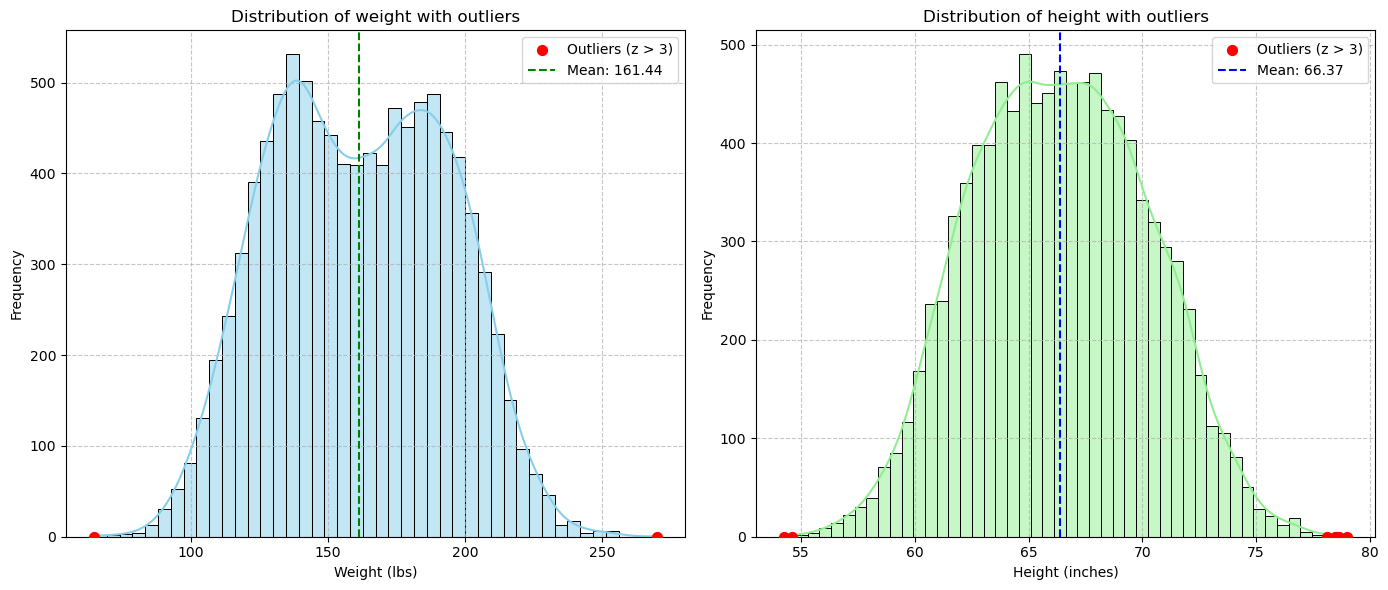

In [12]:
plt.figure(figsize=(14,6))  # Setting figure size for better readability

# --- Plot for Weight ---
plt.subplot(1,2,1)  # 1 row, 2 columns, first plot
sns.histplot(df['Weight'], kde=True, color='skyblue')  # Histogram with KDE overlay

# Scatter plot marking outliers at y=0 for clarity
plt.scatter(weight_outliers['Weight'], [0] * len(weight_outliers), 
            color='red', s=50, zorder=5, label=f'Outliers (z > {zscore_threshold})')

# Vertical line for mean value
plt.axvline(weight_mean, color='green', linestyle='--', label=f'Mean: {weight_mean:.2f}')
plt.title('Distribution of weight with outliers')
plt.xlabel('Weight (lbs)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# --- Plot for Height ---
plt.subplot(1,2,2)  # 1 row, 2 columns, second plot
sns.histplot(df['Height'], kde=True, color='lightgreen')  # Histogram with KDE overlay

# Scatter plot marking outliers at y=0 for clarity
plt.scatter(height_outliers['Height'], [0] * len(height_outliers), 
            color='red', s=50, zorder=5, label=f'Outliers (z > {zscore_threshold})')

# Vertical line for mean value
plt.axvline(height_mean, color='blue', linestyle='--', label=f'Mean: {height_mean:.2f}')
plt.title('Distribution of height with outliers')
plt.xlabel('Height (inches)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

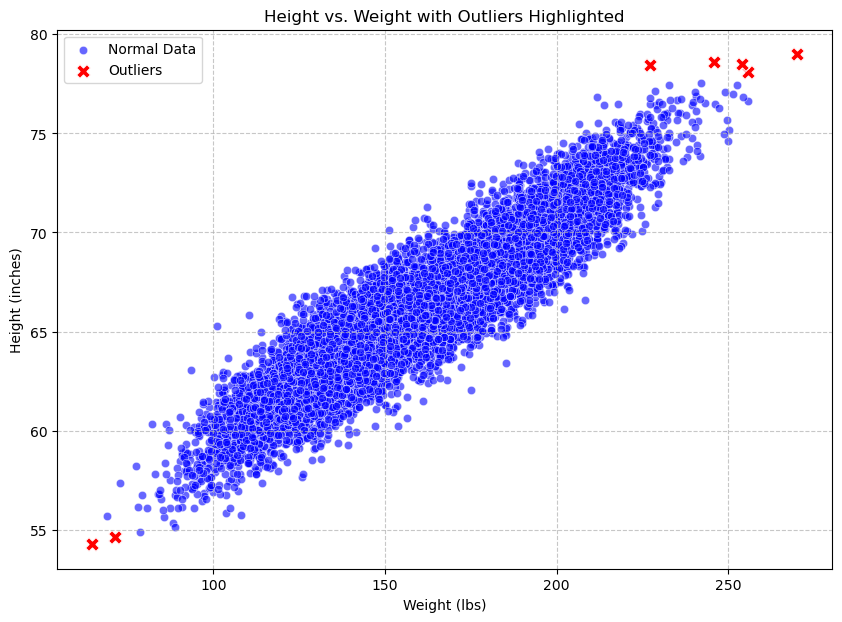

In [13]:
# Create a scatter plot of Height vs. Weight with outliers highlighted
plt.figure(figsize=(10, 7))  # Set figure size for better visibility

# Plot normal data points in blue
sns.scatterplot(x='Weight', y='Height', data=df, color='blue', alpha=0.6, label='Normal Data')

# Overlay outliers in red with 'X' markers for emphasis
sns.scatterplot(x='Weight', y='Height', data=all_outliers, color='red', s=100, label='Outliers', marker='X')

# Add labels and title for clarity
plt.title('Height vs. Weight with Outliers Highlighted')
plt.xlabel('Weight (lbs)')
plt.ylabel('Height (inches)')
plt.legend()

# Improve readability with a grid
plt.grid(True, linestyle='--', alpha=0.7)

# Display the plot
plt.show()

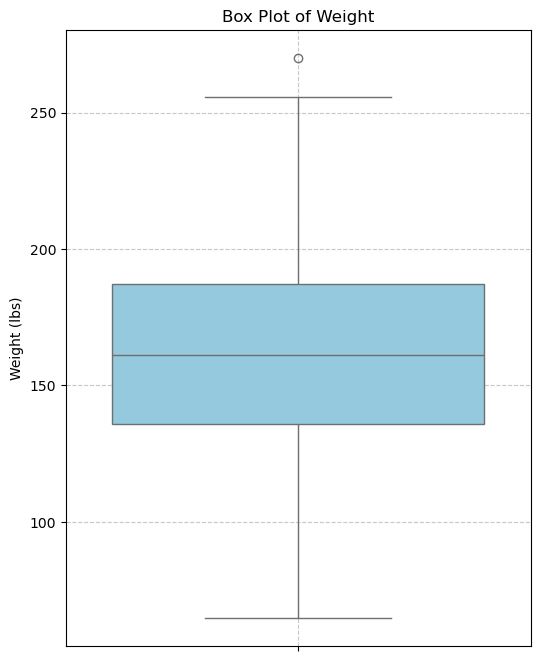

In [14]:
# --- Box Plot for Weight ---
plt.figure(figsize=(6, 8))  # Adjust figure size for readability

# Create a box plot for weight distribution
sns.boxplot(y=df['Weight'], color='skyblue')

# Add title and labels for clarity
plt.title('Box Plot of Weight')
plt.ylabel('Weight (lbs)')

# Improve readability with grid lines
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()